In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import json

In [3]:
df = pd.read_csv("Poverty by Poverty Level.csv")
df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101
1,Battery Park/Tribeca,100 to 199% FPL,2005,Number,2832.15700,101
2,Battery Park/Tribeca,Below 200% FPL,2005,Number,8240.83783,101
3,Battery Park/Tribeca,200 to 399% FPL,2005,Number,7391.95804,101
4,Battery Park/Tribeca,400% FPL and above,2005,Number,37323.65351,101
...,...,...,...,...,...,...
9745,Brooklyn,100 to 199% FPL,2019,Percent,0.17787,36047
9746,Manhattan,100 to 199% FPL,2019,Percent,0.11092,36061
9747,Queens,100 to 199% FPL,2019,Percent,0.17272,36081
9748,Staten Island,100 to 199% FPL,2019,Percent,0.11962,36085


In [4]:
df.drop(df.index[df['Location'] == 'Brooklyn'], inplace = True)
df.drop(df.index[df['Location'] == 'Manhattan'], inplace = True)
df.drop(df.index[df['Location'] == 'Queens'], inplace = True)
df.drop(df.index[df['Location'] == 'Staten Island'], inplace = True)
df.drop(df.index[df['Location'] == 'New York City'], inplace = True)
df.drop(df.index[df['Location'] == 'Bronx'], inplace = True)
df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101
1,Battery Park/Tribeca,100 to 199% FPL,2005,Number,2832.15700,101
2,Battery Park/Tribeca,Below 200% FPL,2005,Number,8240.83783,101
3,Battery Park/Tribeca,200 to 399% FPL,2005,Number,7391.95804,101
4,Battery Park/Tribeca,400% FPL and above,2005,Number,37323.65351,101
...,...,...,...,...,...,...
9739,Queens Village,100 to 199% FPL,2019,Percent,0.11481,413
9740,The Rockaways,100 to 199% FPL,2019,Percent,0.17979,414
9741,St. George,100 to 199% FPL,2019,Percent,0.11194,501
9742,South Beach,100 to 199% FPL,2019,Percent,0.15882,502


In [5]:
df = df.loc[df['DataFormat'] == 'Number']
df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101
1,Battery Park/Tribeca,100 to 199% FPL,2005,Number,2832.15700,101
2,Battery Park/Tribeca,Below 200% FPL,2005,Number,8240.83783,101
3,Battery Park/Tribeca,200 to 399% FPL,2005,Number,7391.95804,101
4,Battery Park/Tribeca,400% FPL and above,2005,Number,37323.65351,101
...,...,...,...,...,...,...
9414,Queens Village,100 to 199% FPL,2019,Number,22590.00000,413
9415,The Rockaways,100 to 199% FPL,2019,Number,21113.00000,414
9416,St. George,100 to 199% FPL,2019,Number,19394.00000,501
9417,South Beach,100 to 199% FPL,2019,Number,21726.00000,502


In [6]:
dict1 = {
'Below 100% FPL': 'Below 25,750 USD',
'100 to 199% FPL': '25,750 to 51,499 USD',
'Below 200% FPL': 'Below 51,500 USD',
'200 to 399% FPL': '51,500 to 102,999 USD',
'400% FPL and above': '100,300 USD and above'
}

In [7]:
df['Poverty_Level'] = df['Poverty Level']
df['Poverty_Level'] = df['Poverty_Level'].replace(dict1)
df

<ipython-input-7-085ab6fb7cc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Poverty_Level'] = df['Poverty Level']
<ipython-input-7-085ab6fb7cc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Poverty_Level'] = df['Poverty_Level'].replace(dict1)


,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,Poverty_Level
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101,"Below 25,750 USD"
1,Battery Park/Tribeca,100 to 199% FPL,2005,Number,2832.15700,101,"25,750 to 51,499 USD"
2,Battery Park/Tribeca,Below 200% FPL,2005,Number,8240.83783,101,"Below 51,500 USD"
3,Battery Park/Tribeca,200 to 399% FPL,2005,Number,7391.95804,101,"51,500 to 102,999 USD"
4,Battery Park/Tribeca,400% FPL and above,2005,Number,37323.65351,101,"100,300 USD and above"
...,...,...,...,...,...,...,...
9414,Queens Village,100 to 199% FPL,2019,Number,22590.00000,413,"25,750 to 51,499 USD"
9415,The Rockaways,100 to 199% FPL,2019,Number,21113.00000,414,"25,750 to 51,499 USD"
9416,St. George,100 to 199% FPL,2019,Number,19394.00000,501,"25,750 to 51,499 USD"
9417,South Beach,100 to 199% FPL,2019,Number,21726.00000,502,"25,750 to 51,499 USD"


In [8]:
df_sum = df.groupby(['Poverty_Level', 'TimeFrame'])['Data'].sum()
df_sum

Poverty_Level          TimeFrame
100,300 USD and above  2005         2735707.0
                       2006         2740115.0
                       2007         2812422.0
                       2008         2950688.0
                       2009         2989820.0
                                      ...    
Below 51,500 USD       2015         3284498.0
                       2016         3180971.0
                       2017         3089625.0
                       2018         2921470.0
                       2019         2682754.0
Name: Data, Length: 75, dtype: float64

In [9]:
df_sum = df_sum.reset_index()
df_sum.head()

,Poverty_Level,TimeFrame,Data
0,"100,300 USD and above",2005,2735707.0
1,"100,300 USD and above",2006,2740115.0
2,"100,300 USD and above",2007,2812422.0
3,"100,300 USD and above",2008,2950688.0
4,"100,300 USD and above",2009,2989820.0


In [10]:
df_sum_mean = df_sum.groupby(['Poverty_Level'])['Data'].mean()
df_sum_mean

Poverty_Level
100,300 USD and above    2.931912e+06
25,750 to 51,499 USD     1.560852e+06
51,500 to 102,999 USD    2.158948e+06
Below 25,750 USD         1.574002e+06
Below 51,500 USD         3.134853e+06
Name: Data, dtype: float64

Text(0.5, 1.0, 'Population Income Levels in NYC')

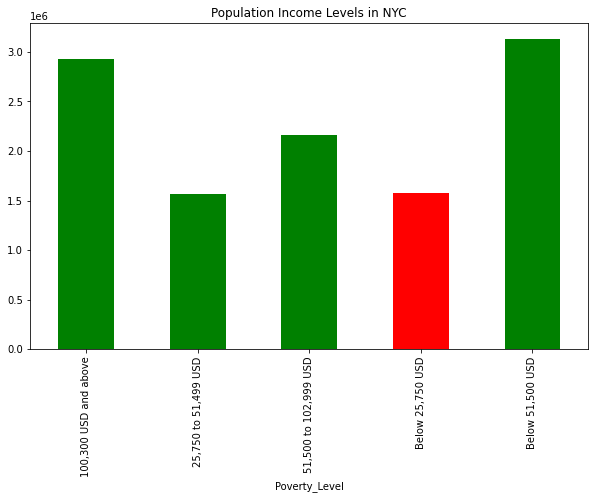

In [11]:
poverty_graph = df_sum_mean.plot.bar(figsize=(10,6), color=['green', 'green', 'green', 'red', 'green'])
poverty_graph.set_title('Population Income Levels in NYC')

In [12]:
searchfor = ['Below 100% FPL']
top10_pov = df[df['Poverty Level'].str.contains('|'.join(searchfor))]
top10_pov

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,Poverty_Level
0,Battery Park/Tribeca,Below 100% FPL,2005,Number,5408.68084,101,"Below 25,750 USD"
5,Battery Park/Tribeca,Below 100% FPL,2006,Number,7832.95553,101,"Below 25,750 USD"
10,Battery Park/Tribeca,Below 100% FPL,2007,Number,4017.84258,101,"Below 25,750 USD"
15,Battery Park/Tribeca,Below 100% FPL,2008,Number,5020.58688,101,"Below 25,750 USD"
20,Battery Park/Tribeca,Below 100% FPL,2009,Number,4401.09040,101,"Below 25,750 USD"
...,...,...,...,...,...,...,...
9219,Queens Village,Below 100% FPL,2019,Number,11279.00000,413,"Below 25,750 USD"
9220,The Rockaways,Below 100% FPL,2019,Number,22570.00000,414,"Below 25,750 USD"
9221,St. George,Below 100% FPL,2019,Number,18624.00000,501,"Below 25,750 USD"
9222,South Beach,Below 100% FPL,2019,Number,8588.00000,502,"Below 25,750 USD"


In [13]:
top10_pov_stats = top10_pov.groupby('Location')['Data'].mean()
top10_pov_stats = top10_pov_stats.sort_values(ascending = False)
top10_pov_stats = top10_pov_stats.head(10)
top10_pov_stats

Location
University Heights      53699.200000
Concourse/Highbridge    50812.533333
Washington Heights      48809.666667
Unionport/Soundview     48012.133333
Borough Park            47147.733333
East New York           44856.600000
Brownsville             42385.933333
Bedford Stuyvesant      41492.533333
Bedford Park            40713.266667
Lower East Side         40681.733333
Name: Data, dtype: float64

Text(0.5, 1.0, 'Top 10 NYC Regions in Poverty')

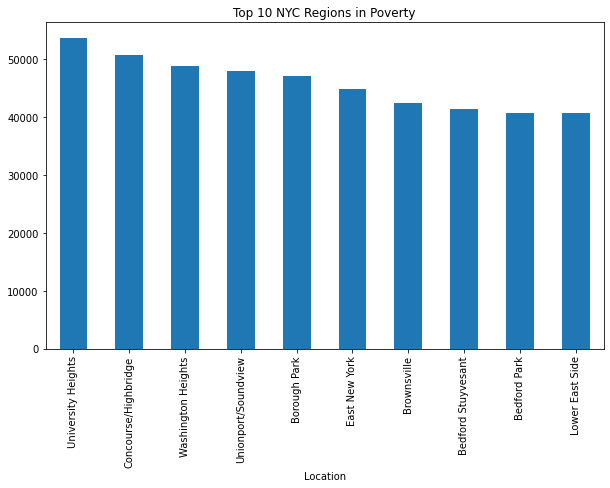

In [14]:
top10_pov_graph = top10_pov_stats.plot.bar(figsize=(10,6))
top10_pov_graph.set_title('Top 10 NYC Regions in Poverty')

In [17]:
cd = [110,111,201,202,203,204,205,206]
top_asthma_df = df.loc[df['Fips'].isin(cd)]
top_asthma_df

,Location,Poverty Level,TimeFrame,DataFormat,Data,Fips,Poverty_Level
630,Central Harlem,Below 100% FPL,2005,Number,39121.00000,110,"Below 25,750 USD"
631,Central Harlem,100 to 199% FPL,2005,Number,22217.00000,110,"25,750 to 51,499 USD"
632,Central Harlem,Below 200% FPL,2005,Number,61338.00000,110,"Below 51,500 USD"
633,Central Harlem,200 to 399% FPL,2005,Number,31232.00000,110,"51,500 to 102,999 USD"
634,Central Harlem,400% FPL and above,2005,Number,24124.00000,110,"100,300 USD and above"
...,...,...,...,...,...,...,...
9373,Hunts Point,100 to 199% FPL,2019,Number,11848.69770,202,"25,750 to 51,499 USD"
9374,Morrisania,100 to 199% FPL,2019,Number,21736.77175,203,"25,750 to 51,499 USD"
9375,Concourse/Highbridge,100 to 199% FPL,2019,Number,43312.00000,204,"25,750 to 51,499 USD"
9376,University Heights,100 to 199% FPL,2019,Number,32217.00000,205,"25,750 to 51,499 USD"


In [20]:
top_asthma_df_sum = top_asthma_df.groupby(['Location','Poverty_Level', 'TimeFrame'])['Data'].sum()
top_asthma_df_sum

Location            Poverty_Level          TimeFrame
Central Harlem      100,300 USD and above  2005         24124.0
                                           2006         26749.0
                                           2007         25237.0
                                           2008         31449.0
                                           2009         38189.0
                                                         ...   
University Heights  Below 51,500 USD       2015         92461.0
                                           2016         83338.0
                                           2017         97798.0
                                           2018         85833.0
                                           2019         76138.0
Name: Data, Length: 600, dtype: float64

In [22]:
top_asthma_df_sum = top_asthma_df_sum.to_frame()
top_asthma_df_sum = top_asthma_df_sum.reset_index()
top_asthma_df_sum

,Location,Poverty_Level,TimeFrame,Data
0,Central Harlem,"100,300 USD and above",2005,24124.0
1,Central Harlem,"100,300 USD and above",2006,26749.0
2,Central Harlem,"100,300 USD and above",2007,25237.0
3,Central Harlem,"100,300 USD and above",2008,31449.0
4,Central Harlem,"100,300 USD and above",2009,38189.0
...,...,...,...,...
595,University Heights,"Below 51,500 USD",2015,92461.0
596,University Heights,"Below 51,500 USD",2016,83338.0
597,University Heights,"Below 51,500 USD",2017,97798.0
598,University Heights,"Below 51,500 USD",2018,85833.0


In [23]:
top_asthma_df_sum_mean = top_asthma_df_sum.groupby(['Poverty_Level'])['Data'].mean()
top_asthma_df_sum_mean

Poverty_Level
100,300 USD and above    14222.083333
25,750 to 51,499 USD     26847.500000
51,500 to 102,999 USD    24699.616667
Below 25,750 USD         37975.358333
Below 51,500 USD         64822.858333
Name: Data, dtype: float64

Text(0.5, 1.0, 'Population Income Levels in High Asthma Regions')

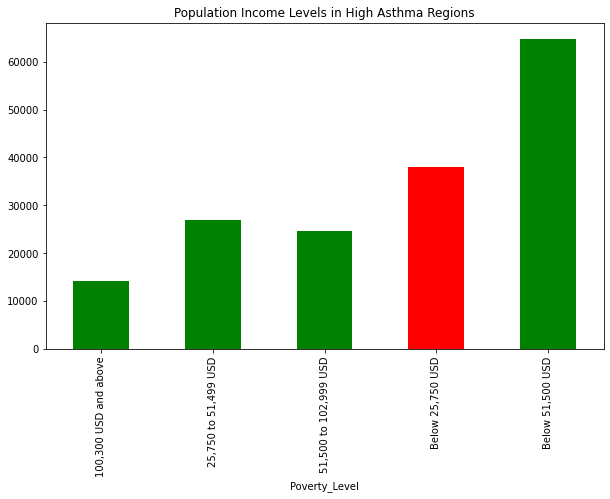

In [30]:
poverty_asthma_graph = top_asthma_df_sum_mean.plot.bar(figsize=(10,6), color=['green', 'green', 'green', 'red', 'green'])
poverty_asthma_graph.set_title('Population Income Levels in High Asthma Regions')